In [1]:
# Run necessary imports

from problems import *
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
# Define problem 

class SocialNetworkProblem(Problem):
    friendsList = [None] * 4039

    def __init__(self, initial, goal=None):
        self.initial = initial
        self.goal = goal

        friendsFile = open("../data/friendsLists.txt")

        for line in friendsFile:
            list_tokens = line.split()
            list = []

            for token in list_tokens[1:]:
                list.append(token)

            self.friendsList[int(list_tokens[0])] = list

    def actions(self, state):
        return self.friendsList[int(state)]

    def transition(self, state, action):
        return action

    def path_cost(self, cost, state_from, state_to):
        return cost + 1

In [9]:
# Generate random connected tuples

tuples = []

fake_problem = SocialNetworkProblem(0,0)

for i in range(0,10):
    # steps = random.randint(2,3)
    start = str(random.randint(0,4038))
    end = str(random.randint(0,4038))
    # for j in range(0, steps):
        # possible_state = fake_problem.actions(end)
        # end = possible_state[random.randint(0, len(possible_state)-1)]
    tuples.append((start,end))

print(tuples)

[('845', '3858'), ('3121', '8'), ('1296', '2612'), ('1464', '1138'), ('2924', '2043'), ('3358', '3556'), ('1230', '914'), ('3050', '2738'), ('1348', '4017'), ('620', '3063')]


Bidirectional BFS: 100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


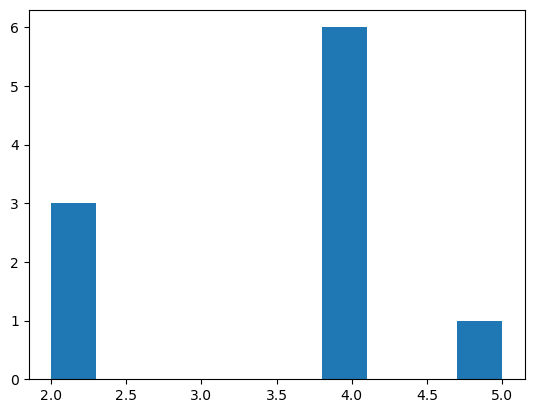

In [13]:
# Use BiBFS to find connectinos
lengths_bbfs = []

for tuple in tqdm(tuples, desc = "Bidirectional BFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = bidirectional_breadth_first_search(problem)
    lengths_bbfs.append(len(solution))

plt.hist(lengths_bbfs)
plt.show()

Unidirectional BFS: 100%|██████████| 10/10 [00:16<00:00,  1.63s/it]


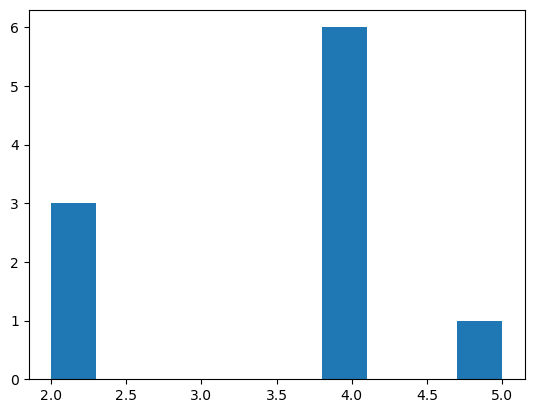

In [14]:
# Use BFS to find connections
lengths_bfs = []

for tuple in tqdm(tuples, desc = "Unidirectional BFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = breadth_first_search(problem)
    lengths_bfs.append(len(solution))

plt.hist(lengths_bfs)
plt.show()

In [6]:
# Use DFS to find connections
lengths_dfs = []

for tuple in tqdm(tuples, desc = "DFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = depth_first_search(problem)
    lengths_dfs.append(len(solution))

plt.hist(lengths_dfs)
plt.show()

DFS:   0%|          | 0/10 [00:06<?, ?it/s]


KeyboardInterrupt: 

DLS w/ limit=6: 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


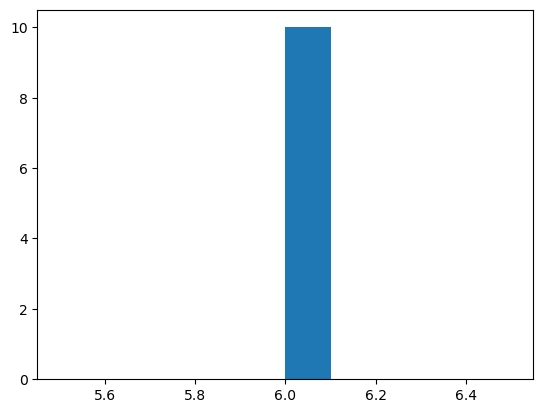

In [7]:
# Use DLS w/ limit=6 to find connections
lengths_dls = []

for tuple in tqdm(tuples, desc = "DLS w/ limit=6"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = depth_limited_search(problem,6)
    lengths_dls.append(len(solution))

plt.hist(lengths_dls)
plt.show()

IDDFS:   0%|          | 0/10 [00:00<?, ?it/s]

0
1
2
3
0
1
2
3


IDDFS:  20%|██        | 2/10 [00:00<00:01,  5.10it/s]

4
0
1
2
3
4
0
1
2
3
4
5


IDDFS:  40%|████      | 4/10 [00:09<00:17,  2.90s/it]

0
1
2
0
1
2
3
4
5


IDDFS:  90%|█████████ | 9/10 [00:38<00:04,  4.14s/it]

0
1
2
0
1
0
1
2
0
1
2
3


IDDFS: 100%|██████████| 10/10 [00:39<00:00,  3.91s/it]

4


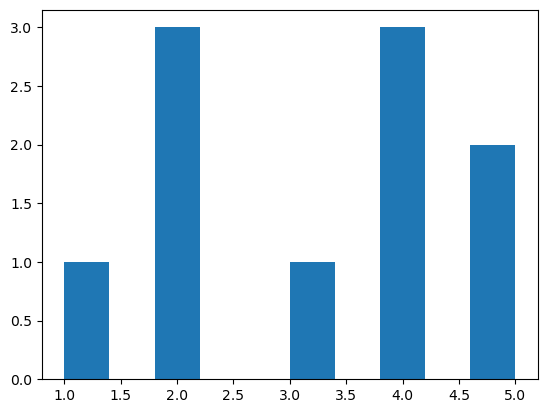

In [8]:
# Use IDDFS to find connections
lengths_iddfs = []

for tuple in tqdm(tuples, desc = "IDDFS"):
    problem = SocialNetworkProblem(tuple[0], tuple[1])
    solution = iterative_deepening_search(problem)
    lengths_iddfs.append(len(solution))

plt.hist(lengths_iddfs)
plt.show()